In [164]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
from qiskit.tools.monitor import job_monitor

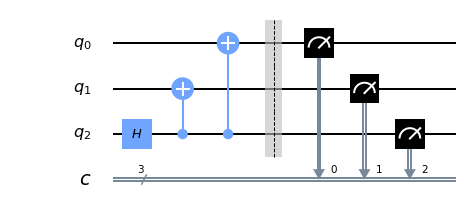

In [165]:
# Este circuito es el podeis cambiar para probar cosas distintas

circuito = QuantumCircuit(3,3)

circuito.h(2)
circuito.cx(2,1)
circuito.cx(2,0)

circuito.barrier(range(3))

circuito.measure(range(3), range(3))
circuito.draw('mpl')

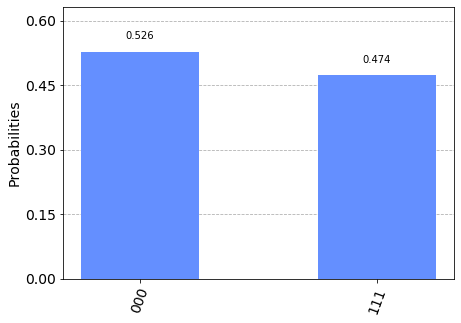

In [166]:
backend = Aer.get_backend('qasm_simulator')
job1 = execute(circuito, backend, shots = 1024)
result1 = job1.result().get_counts(circuito)
plot_histogram(result1)


In [167]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_burlington')

# burlington es el computador cúantico real que utilizaré, 
#en IBM Q-experience podeis ver todas las posibles opciones

Credentials are already in use. The existing account in the session will be replaced.


5ed4e1132398ec001a110b3c
Job Status: job has successfully run


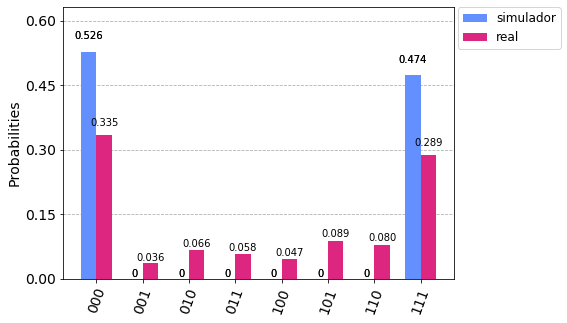

In [168]:
job2 = execute(circuito, backend = device, shots = 1024)
print(job2.job_id())
job_monitor(job2)
result2 = job2.result().get_counts()
plot_histogram([result1, result2], legend = ['simulador', 'real'])

# La probabilidad de error obtenida en el video es de 38 %

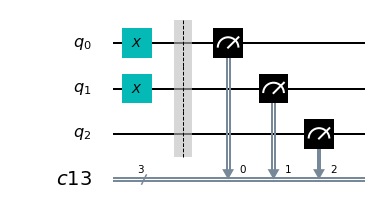

In [169]:
circuitos_base, etiquetas_estado = complete_meas_cal(qr=circuito.qregs[0])
circuitos_base[3].draw(output = 'mpl')

5ed4e17c8356a6001a55b8d5
Job Status: job has successfully run


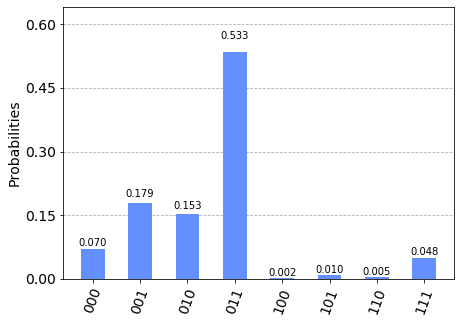

In [170]:
job3 = execute(circuitos_base, backend=device, shots=8192)
print(job3.job_id())
job_monitor(job3)
result3 = job3.result()
plot_histogram(result3.get_counts(circuitos_base[3]))

In [171]:
fitter = CompleteMeasFitter(result3, etiquetas_estado)
fitter.cal_matrix

array([[0.72888184, 0.20141602, 0.19897461, 0.07043457, 0.04260254,
        0.01171875, 0.0135498 , 0.0057373 ],
       [0.09130859, 0.62219238, 0.04956055, 0.17871094, 0.0098877 ,
        0.0390625 , 0.00646973, 0.01306152],
       [0.0411377 , 0.01831055, 0.56799316, 0.15270996, 0.01220703,
        0.0057373 , 0.0300293 , 0.01086426],
       [0.07824707, 0.10217285, 0.12133789, 0.53320312, 0.04016113,
        0.04309082, 0.04577637, 0.06811523],
       [0.00866699, 0.00256348, 0.0065918 , 0.00244141, 0.6829834 ,
        0.19384766, 0.17749023, 0.06616211],
       [0.00390625, 0.00878906, 0.00488281, 0.00952148, 0.08874512,
        0.58325195, 0.04858398, 0.16650391],
       [0.00244141, 0.00292969, 0.01000977, 0.0045166 , 0.03833008,
        0.01989746, 0.55419922, 0.15112305],
       [0.04541016, 0.04162598, 0.04064941, 0.04846191, 0.08508301,
        0.10339355, 0.12390137, 0.51843262]])

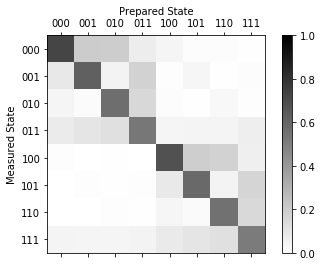

In [172]:
fitter.plot_calibration()

In [173]:
filtro = fitter.filter

In [174]:
resultado_mitigado = filtro.apply(result2)

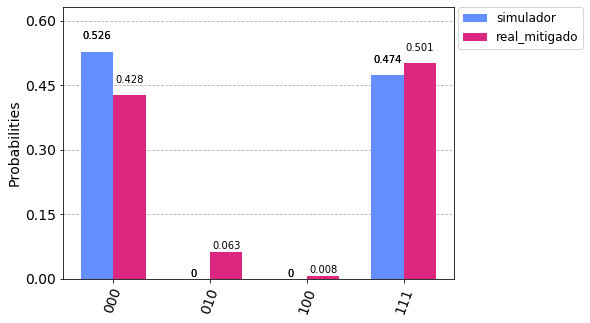

In [175]:
plot_histogram([result1, resultado_mitigado], legend = ['simulador', 'real_mitigado'])

# La probababilidad de error obtenida en el video es de 7%

In [ ]:
#